### Mean of the list

In [1]:
# Write your calculate_mean function here.
def calculate_mean(lst):
  return sum(lst)/len(lst)

if __name__ == '__main__':
  # Run your `calculate_mean` function with examples:
  mean = calculate_mean([1,2.2,0.3,3.4,7.9])
  print(mean)

2.96


### Mean of a 1D array

In [4]:
# Write your calc_stats function here.
import numpy as np

def calc_stats(file):
  data = np.loadtxt(file, delimiter=',')
  return round(np.mean(data),1), round(np.median(data), 1)

if __name__ == '__main__':
  mean = calc_stats('data.csv')
  print(mean)

(11.1, 11.4)


###  Mean of a set of signals
Write a mean_datasets function that reads in a list of CSV files and returns an array of the mean of each cell in the data files.

In [5]:
# Write your mean_datasets function here
def mean_datasets(files):
  if len(files) == 3:
    data1 = np.loadtxt(files[0], delimiter=',')
    data2 = np.loadtxt(files[1], delimiter=',')
    data3 = np.loadtxt(files[2], delimiter=',')
    rows = data1.shape[0]
    columns = data1.shape[1]
    result = []
    for i in range(rows):
      array = []
      for j in range(columns):
        array.append(round((data1[i][j]+data2[i][j]+data3[i][j])/3, 1))
      result.append(array)
    return np.array(result)
    
if __name__ == '__main__':
  # Run your function with the first example from the question:
  print(mean_datasets(['data1.csv', 'data2.csv', 'data3.csv']))
  # Run your function with the second example from the question:
  print(mean_datasets(['data4.csv', 'data5.csv', 'data6.csv']))

[[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
[[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


###  Read a FITS file

One of the most widely used formats for astronomical images is the Flexible Image Transport System. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.

Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. Each HDU stores headers and (optionally) image data.

The header contains metadata about the HDU object, e.g. its dimensions and data type. Every HDU can contain image data. The first HDU is called the primary HDU.

The image data is conveniently stored in a NumPy array, so we can operate on it directly. This example prints the dimensions of the image in the primary HDU.

(71, 850)


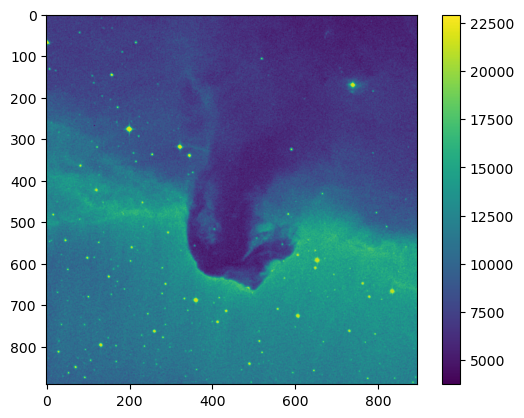

In [6]:
# Write your load_fits function here.
from astropy.io import fits

def load_fits(file):
  hdulist = fits.open(file)
  data = hdulist[0].data
  max_element = max(data[0])
  max_column = np.argmax(data[0])
  max_row = 0
  for i in range(len(data)):
    if max(data[i]) >= max_element:
      max_element = max(data[i])
      max_column = np.argmax(data[i])
      max_row = i
    else:
      continue
  return (max_row, max_column)

from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
    
if __name__ == '__main__':
  # Run your `load_fits` function with examples:
  bright = load_fits(image_file)
  print(bright)

  # You can also confirm your result visually:
  import matplotlib.pyplot as plt

  hdulist = fits.open(image_file)
  data = hdulist[0].data

  # Plot the 2D image data
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

### Mean of a set of FITS files

Write a mean_fits function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files. All the images have the same dimensions and your calculated mean array should match those dimensions.

1.3459429


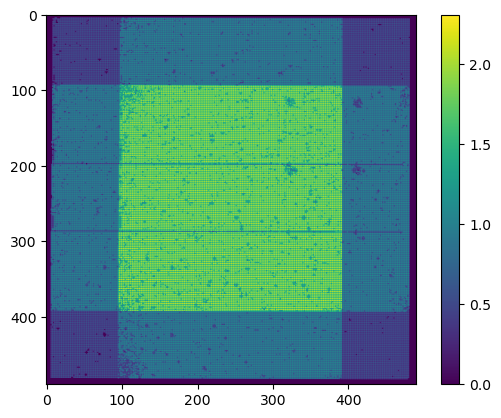

In [32]:
# Write your mean_fits function here:
from astropy.io import fits
import numpy as np

def mean_fits(files):
  hdulist = fits.open(files[0])
  data = hdulist[2].data
  mean_img = np.zeros_like(data)
  for i in files:
    hdulist = fits.open(i)
    data = hdulist[2].data
    mean_img += data
  return mean_img/len(files)

if __name__ == '__main__':
  
  # Test your function with examples from the question
  data  = mean_fits(['image1.fits', 'image2.fits'])
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()